<a href="https://colab.research.google.com/github/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/blob/main/Notebooks/Aquisicao_e_transformacao_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color= MediumSpringGreen		size = 6> Bootcamp Data Science Alura - Projeto Final </font>

# <font color= MediumSpringGreen		size = 6>
Previsão da admissão na UTI:
Um modelo de Machine Learning a partir de dados dos pacientes do Hospital Sírio Libanês </font>

1º Notebook

Elaborado por [Francisco Foz](https://www.linkedin.com/in/francisco-tadeu-foz/)

Data: 18/02/2022

## <font color= MediumSpringGreen> Introdução

Olá! 

Neste repositório você encontrará o meu projeto final do Bootcamp Data Science 2021-22 da [Alura](https://www.alura.com.br/).

Durante todo o Bootcamp tive a oportunidade de mergulhar no oceano da Ciência de Dados a partir de dados reais da área da saúde em 6 módulos.

___ 

## <font color= MediumSpringGreen> Projeto

### <font color= MediumSpringGreen> Contexto

Devido a pandemia de COVID-19, os hospitais ficaram sobrecarregados faltando recursos de saúde como leitos de UTI, profissionais entre outros. 

Há a necessidade de prever a quantidade necessária de recursos, principalmente de leitos de UTI. 
Para isso foram utilizados dados clínicos individuais de pacientes afim de se estabelecer um modelo e conseguir otimizar a necessidade real da permissão de entrada.

Foram utilizados os dados disponibilizados pelo Hospital Sírio-Libanês no [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) .

### <font color= MediumSpringGreen> Conjunto de Dados

Ele é formado por dados anônimos do Hospital Sírio-Libanês (São Paulo e Brasília). 

Os dados foram limpos e dimensionados em cada coluna de com o "Min Max Scaler" para ficar entre -1 e 1.

A quantidade de características (colunas) para cada tipo de informação agrupadas são:

*    Informações demográficas do paciente (03)
*    Doenças agrupadas anteriores do paciente (09)
*    Resultados de sangue (36)
*    Sinais vitais (06)

Totalizando 54 características, que ainda se desdobram em sua média, mediana, max, min etc. 

A coluna ICU é o resultado da informação se a pessoa foi ou não para a UTI, a partir da janela "Window" que é a escala de tempo medido de cada linha.

Como abaixo:

Janela:	
* De 0 a 2 horas da admissão
* De 2 a 4 horas da admissão
* De 4 a 6 horas da admissão
* Das 6 às 12 horas da admissão
* Acima de 12 horas da admissão

### <font color= MediumSpringGreen> Estrutura do projeto

Este projeto realizará as 4 primeiras etapas do workflow de um projeto de Machine Learning, entregando o resultado para ser realizado posteriormente o Deploy e monitoramento.

![](https://github.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/raw/main/Imagens/Workflow_ML.jpg)


Desta forma o projeto foi dividido em 3 notebooks:

* 1º Notebook: **Aquisição e transformação dos dados**
  *    Limpeza
  *    Análise exploratória

* 2º Notebook: [**Desenvolvimento do modelo**](https://colab.research.google.com/drive/1J6I65AjMZXiLiz8KGwaaQr1s-DALkKiq?usp=sharing)
  *    Treino
  *    Teste

* 3º Notebook: [**Funções Criadas**](https://colab.research.google.com/drive/1zQMGbtZ3qG_CCBCOZ1Pl6-ea9irlXmW1?usp=sharing)
  
  Notebook com todas as funções criadas para o projeto.



### <font color= MediumSpringGreen> Bibliotecas utilizadas em todo o projeto

Requirements



*   pandas==1.3.5
*   openpyxl==3.0.9
*   numpy==1.21.0
*   matplotlib==3.4.2
*   imgaug==0.2.9
*   scikit-learn==1.0.2
*   skopt==0.9





Importarei as bibliotecas necessárias, configuradas no "requirements.txt" do projeto.

Devido outra versão do matplotlib, será necessário restartar o ambiente após a desisntalação da versão pré instalada no colab.


In [ ]:
!pip install wget
import wget

wget.download('https://raw.githubusercontent.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/main/requirements.txt', 'requirements.txt')

'requirements (1).txt'

In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

## <font color= MediumSpringGreen> Importação das funções

Importarei o notebook com todas as funções necessárias para o projeto.

In [ ]:
wget.download('https://github.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/raw/main/Notebooks/notebook_de_funcoes.py', 'funcoes.py')

'funcoes (1).py'

In [ ]:
import funcoes as f

## <font color= MediumSpringGreen> Importação de dados

Realizei o download no [Kaggle](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19), do dataset e deixei ele salvo no [repositório](https://github.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/tree/main/Dados) do meu Github. 

A partir disso, realizei a importação diretamente para o notebook.

In [ ]:
dados = pd.read_excel('https://github.com/FranciscoFoz/Projeto_Final_Bootcamp_Data_Science_Alura/blob/main/Dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true')
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


## <font color= MediumSpringGreen> 1. Limpeza dos dados



Excluirei as linhas dos pacientes que estejam com entrada positiva na UTI dentro da primeira janela(0-2)

In [ ]:
dados_sem_pacientes_positivos_na_primeira_janela = f.remover_pacientes_com_primeira_janela_positiva_para_UTI(dados)    

In [ ]:
dados_sem_pacientes_positivos_na_primeira_janela

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


O conjunto de dados está com dados faltantes, por isso irei preencher com os dados posteriores e anteriores a ela.

In [ ]:
dados_preenchidos = f.preenche_tabela(dados_sem_pacientes_positivos_na_primeira_janela)

In [ ]:
dados_preenchidos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Para que possamos trabalhar apenas com os dados da primeira janela do horário, verifiquei para cada paciente o resultado se ele iria para a UTI ou não.
Se ele fosse, preencheria o valor em "ICU" e retornaria apenas as linhas com as primeiras janelas.

In [ ]:
dados_primeira_janela = dados_preenchidos.groupby('PATIENT_VISIT_IDENTIFIER').apply(f.prepara_janela)         #Agrupar pelo id do paciente e aplicar a função.

Exclui o ID do paciente, pois ele já se encontra no indíce.

In [ ]:
dados_sem_coluna_id_paciente = f.excluir_coluna_id_paciente(dados_primeira_janela)                #Excluir colunas

Transformei os dados da coluna "AGE_PERCENTIL" em dados categóricos, pois será necessário para que o modelo leia corretamente.

In [ ]:
dados_limpos = f.transformar_AGE_PERCENTIL_em_dados_categoricos(dados_sem_coluna_id_paciente)       #Transformar dados da coluna em categóricos

Para quando testar os modelos os dados não possuam uma tendência de sobreajuste (Overfitting), excluirei as variáveis que possuam uma alta correlação (0.95).

In [ ]:
dados_limpos_sem_corr = f.remover_variaveis_correlacionadas(dados_limpos,0.95)    #Excluir colunas com alta correlação


Acredito que na maioria dos casos, os dados de gênero não deveriam entrar em modelos de machine learning, devido a preocupação da criação de vieses.

Entretanto decidi manter eles neste conjunto de dados, devido aos artigos científicos de [Iaccarino et al (2020)](https://doi.org/10.1371/journal.pone.0237297) e [PECKHAM et al (2020)](https://doi.org/10.1038/s41467-020-19741-6) trazerem que há uma implicação que diferencia e aumenta o risco em relação ao gênero.


In [ ]:
dados_limpos_sem_corr

,,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.500000,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
3,15,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
5,25,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428571,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,0-2,0
382,1910,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


Afim de se limpar o conjunto de dados completamente, irei retirar as colunas que possuam apenas um valor único para todas as linhas. Serão as variáveis com o cálculo de "diff".

In [ ]:
dados_sem_valores_unicos = f.limpar_colunas_com_valores_unicos(dados_limpos_sem_corr)   

In [ ]:
dados_sem_valores_unicos.head()

,,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0-2,1
2,10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0-2,1
3,15,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0-2,0
4,20,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0-2,0
5,25,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,0-2,0


In [ ]:
dados_sem_valores_unicos.to_csv('dados_sem_valores_unicos.csv')                       #criar arquivo csv dos dados limpos



---



## <font color= MediumSpringGreen> 2. Análise exploratória

Irei explorar os dados de acordo com as suas classificações:

* Informações demográficas do paciente
* Doenças agrupadas anteriores do paciente
* Resultados de sangue
* Sinais vitais

Correlacionando com a entrada na ou não na UTI.

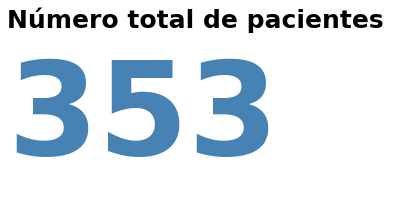

In [ ]:
f.grafico_total_pacientes()

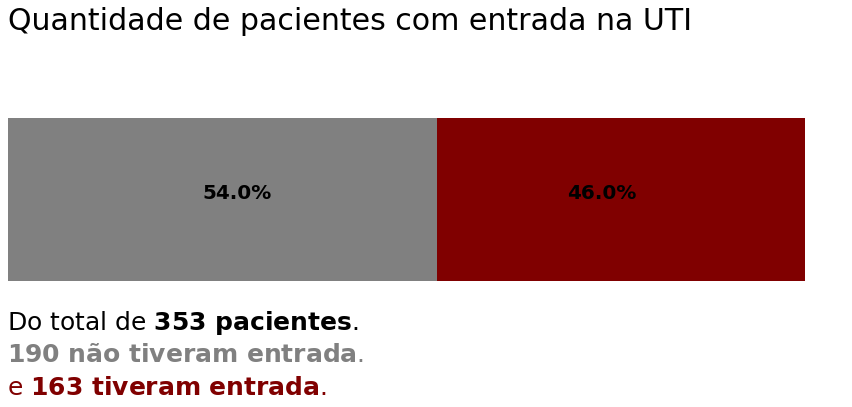

In [ ]:
f.grafico_quantidade_entrada_e_nao_entrada_UTI(dados_sem_valores_unicos)

### <font color= MediumSpringGreen> 2.1 Informações demográficas do paciente



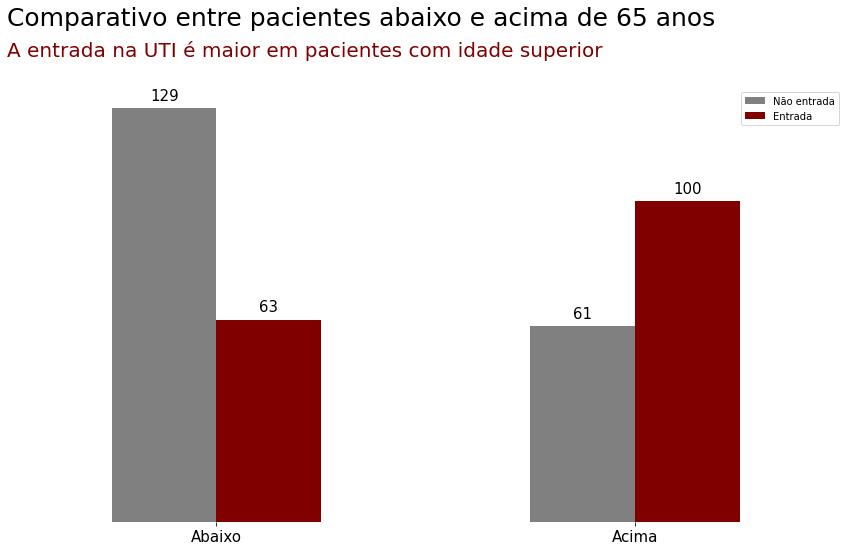

In [ ]:
f.grafico_abaixo_acima_65anos(dados_sem_valores_unicos)

É possível observar que entre os pacientes da amostra a frequencia de entrada na UTI é superior apartir de 65 anos de idade.

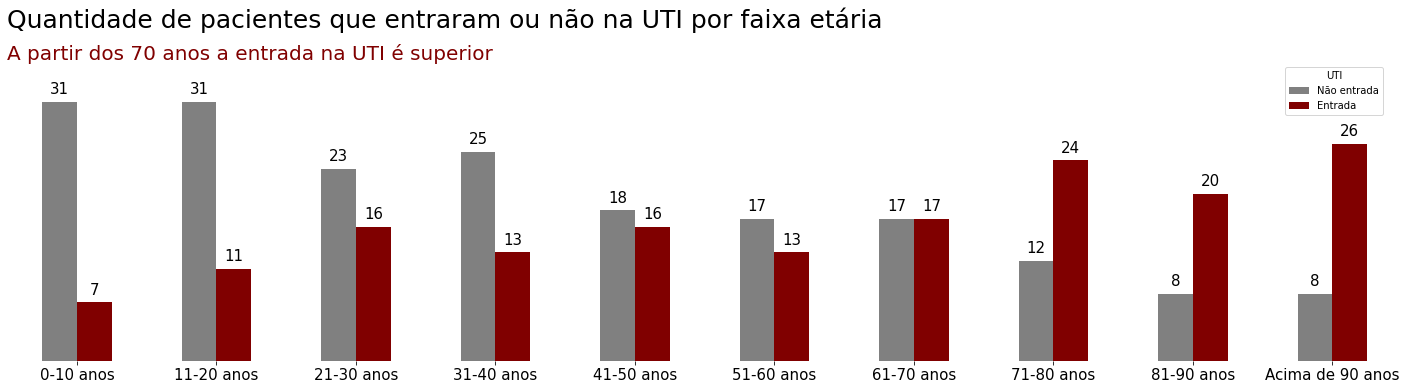

In [ ]:
f.faixa_etaria_entrada_UTI(dados_sem_valores_unicos)

Ao observar todas as faixas etárias, fica mais claro que a apartir dos 71 anos a frequencia de entrada na UTI é mais provável nestes pacientes.

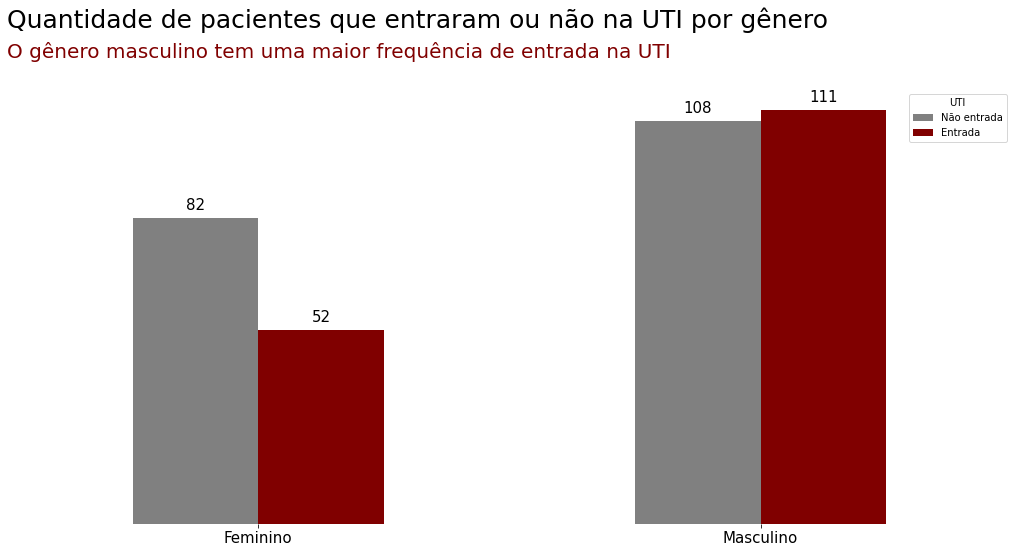

In [ ]:
f.grafico_genero_UTI(dados_sem_valores_unicos)

Conforme observado nos artigos científicos citados anteriormente, o gênero masculino tem uma maior incidência de entrada na UTI do que o feminino.

### <font color= MediumSpringGreen> 2.2 Doenças agrupadas anteriores do paciente



Criei uma tabela de frequências para observar uma visão geral com todas as doenças anteriores dos pacientes e sua influência na entrada na UTI.

Irei verificar a maior frequência do conjunto de variáveis para entender como elas em conjunto influenciam a entrada na UTI.


In [136]:
pacientes_sem_entrada = dados_sem_valores_unicos.query('ICU == 0')
pacientes_com_entrada = dados_sem_valores_unicos.query('ICU == 1')

In [138]:
contagem_de_pacientes_sem_entrada = pacientes_sem_entrada.iloc[:,[3,4,5,6,7,8,9,10,11,-1]].value_counts(normalize=True).reset_index().rename(columns={0:'TOTAL %'})   #Criar tabela de frequência
contagem_de_pacientes_sem_entrada['TOTAL %'] = round(contagem_de_pacientes_sem_entrada['TOTAL %']*100,2)                                                              #Transforma coluna em percentual
contagem_de_pacientes_sem_entrada.head()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ICU,TOTAL %
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,51.58
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,17.89
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,9.47
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,2.11
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,2.11


Dentre os pacientes que não tiveram entrada na UTI, aproximadamente 52% tiveram outras doenças e nenhuma das demais variáveis. 

Aproxidamente 18% não tiveram nenhuma doença, nem dentro da categoria genéricas "outras".

Aproxidamente 9,5% tiveram outras doenças e são imunocromprimidos.

As demais variações estão abaixo de 2% cada uma. 

In [139]:
contagem_de_pacientes_com_entrada = pacientes_com_entrada.iloc[:,[3,4,5,6,7,8,9,10,11,-1]].value_counts(normalize=True).reset_index().rename(columns={0:'TOTAL %'})   #Criar tabela de frequência
contagem_de_pacientes_com_entrada['TOTAL %'] = round(contagem_de_pacientes_com_entrada['TOTAL %']*100,2)                                                              #Transforma coluna em percentual
contagem_de_pacientes_com_entrada.head()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ICU,TOTAL %
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,40.49
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,14.72
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,7.36
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,4.29
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,3.07


Dentre os pacientes que tiveram entrada na UTI, aproximadamente 40% tiveram outras doenças e nenhuma das demais variáveis. 

Aproxidamente 15% não tiveram nenhuma doença, nem dentro da categoria genéricas "outras".

Aproxidamente 7,5% tiveram outras doenças e são imunocromprimidos.

As demais variações estão abaixo de 4% cada uma. 

Pode-se observar que a maior concentração está na variável de outras doenças ou que não tiveram nenhumas dessas. 

### <font color= MediumSpringGreen> 2.2 Resultados de sangue

Entenderei as diferenças entre os resultados de sangue dos pacientes que tiveram entrada na UTI e os que não tiveram.

Irei comparar a diferença percentual entre a a média dos valores de cada indicador, para verificar quais são que houveram maior difença (negativa e positiva).



In [ ]:
sem_entrada = dados_sem_valores_unicos.query("ICU == 0").iloc[:,12:46].reset_index(drop=True) #Separar apenas os pacientes que não tiveram entrada e filtrar apenas os resultados sanguíneos
com_entrada = dados_sem_valores_unicos.query("ICU == 1").iloc[:,12:46].reset_index(drop=True) #Separar apenas os pacientes que tiveram entrada e filtrar apenas os resultados sanguíneos

In [ ]:
sem_entrada.describe()

In [ ]:
com_entrada.describe()

In [ ]:
 (((sem_entrada.describe().loc[['mean']]/ com_entrada.describe().loc[['mean']])*100)-100)

Criarei uma tabela com a diferença percentual entre as médias dos dois conjuntos anteriores.

In [ ]:
diferenca_percentual =  (((sem_entrada.describe().loc[['mean']]/ com_entrada.describe().loc[['mean']])*100)-100).T.sort_values(by='mean',ascending=False) #Criar tabela com valor percentual da diferenças das médias                                                             
diferenca_percentual.index = ['LACTATO', 'PCR', 'SAT02 VENOSO', 'CÁLCIO','POTÁSSIO', 'ALBUMIN', 'UREA', 'GLUCOSE','LEUKOCYTES', 'CREATININ', 'FFA',       #Recriar o índice
                              'SAT02 ARTERIAL', 'BE_VENOUS', 'GGT', 'INR','PH ARTERIAL', 'BLAST', 'DIMER', 'TTPA','BE ARTERIAL', 'BILLIRUBIN', 'TGO',
                              'P02 VENOUS', 'TGP', 'PC02 ARTERIAL','BIC ARTERIAL', 'PC02 VENOUS', 'PLATELETS','P02 ARTERIAL', 'PH VENOSO', 'BIC VENOSO',
                              'LINFÓCITOS', 'HEMATÓCRITOS', 'SÓDIO']
diferenca_percentual['mean'] = round(diferenca_percentual['mean'])                                                                                        #Arredondar os valores
diferenca_percentual

In [ ]:
f.grafico_percentual_diferenca_sanguinea_5_menores(diferenca_percentual)

É possível observar que os indicadores dos pacientes que entraram na UTI tiveram uma queda muito grande (62%) entre os indicadores de sódio e de hematócritos (35%) em relação aos que não tiveram.

In [ ]:
f.grafico_percentual_diferenca_sanguinea_5_maiores(diferenca_percentual)

Já entre os indicadores cresceram, destaco principalmente o Lactato (86%) e o PCR (18%) a mais do que os pacientes que não entraram na UTI.

### <font color= MediumSpringGreen> 2.3 Sinais vitais
Farei da mesma forma como no anterior para os sinais vitais.

Verificando entre os valores médios da características as diferenças, entre os que entraram para os que não entraram.


In [ ]:
dados_sem_valores_unicos.iloc[:,[45,46,47,48,49,50,51,53]].reset_index(drop=True)

Separando os dois dataframes dos pacientes com e sem entrada.


In [ ]:
sinais_vitais_sem_entrada = dados_sem_valores_unicos.query("ICU == 0").iloc[:,[45,46,47,48,49,50,51,53]].reset_index(drop=True).drop(columns=['ICU']) #Separar apenas os pacientes que não tiveram entrada e filtrar apenas os resultados vitais
sinais_vitais_com_entrada = dados_sem_valores_unicos.query("ICU == 1").iloc[:,[45,46,47,48,49,50,51,53]].reset_index(drop=True).drop(columns=['ICU']) #Separar apenas os pacientes que não tiveram entrada e filtrar apenas os resultados vitais

In [ ]:
sinais_vitais_sem_entrada.describe()

In [ ]:
sinais_vitais_com_entrada.describe()

Criando tabela de percentual de diferença.

In [ ]:
diferenca_percentual =  (((sinais_vitais_sem_entrada.describe().loc[['mean']]/ sinais_vitais_com_entrada.describe().loc[['mean']])*100)-100).T.sort_values(by='mean',ascending=False) #Criar tabela com valor percentual da diferenças das médias                                                             
diferenca_percentual.index = ['D-DÍMERO', 'PRESSÃO DIASTÓLICA','PRESSÃO SISTÓLICA','FREQUÊNCIA CARDÍACA','FREQUÊNCIA RESPIRATÓRIA',
                              'TEMPERATURA', 'SATURAÇÃO DE OXIGÊNIO']
diferenca_percentual = diferenca_percentual[:-1]
diferenca_percentual['mean'] = round(diferenca_percentual['mean'])                                                                                        #Arredondar os valores
diferenca_percentual

In [ ]:
f.grafico_percentual_diferenca_indicadores_vitais(diferenca_percentual)

Entre os pacientes que entraram na UTI, a temperatura é em média 35% menor e o D-Dímero 22% maior do que os pacientes que não entraram.

Possivelmente devido a complicações que poderão se agravar, pacientes com D-Dímero (indicador que alerta aumento da coagulação devido a lesões) se elevando e temperatura corporal diminuindo, poderão ter maiores complicações e entraram na UTI.


## <font color= MediumSpringGreen> 3. Considerações parciais

Através da análise exploratória dos dados foi possível:

* Verificar a quantidade de pacientes deram entrada ou não na UTI
* Entender a influência da idade e do gênero nas complicações nestes pacientes
* Analisar o impacto das doenças anteriores dos pacientes na entrada da UTI, mostrando que se fosse possível detalhar ainda mais as doenças agrupadas em OTHERS, talvez teríamos um conjunto mais balanceado e um modelo melhor.
* Entender quais sãos os indicadores sanguíneos que tiveram maiores diferenças.
* Também entender entre os indicadores de sinais vitais que tiveram maior diferença. 